In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# ==============================
# 📌 1) Load Dataset
# ==============================
df = pd.read_csv('/content/EDA_FoodPanda_Cleaned(1).csv')   # เปลี่ยน path ตามที่อัปโหลดใน Colab

# ดูข้อมูลเบื้องต้น
df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,dish_name,category,quantity,price,price_per_item,payment_method,order_frequency,loyalty_points,churned,rating,rating_date,delivery_status,days_since_last_order
0,C5663,Male,Adult,Peshawar,1/14/2024,O9663,8/23/2023,Burger,Italian,5,1478.27,295.654,Cash,38,238,Active,3,10/14/2024,Cancelled,33
1,C2831,Male,Adult,Multan,7/7/2024,O6831,8/23/2023,Burger,Italian,3,956.04,318.680,Wallet,24,81,Active,2,8/21/2025,Delayed,269
2,C2851,Other,Senior,Multan,6/20/2025,O6851,8/23/2023,Fries,Italian,2,882.51,441.255,Cash,42,82,Inactive,3,9/19/2024,Delayed,103
3,C1694,Female,Senior,Peshawar,9/5/2023,O5694,8/23/2023,Pizza,Dessert,4,231.30,57.825,Card,27,45,Active,2,6/29/2025,Delayed,28
4,C4339,Other,Senior,Lahore,12/29/2023,O8339,8/24/2023,Sandwich,Dessert,1,1156.69,1156.690,Cash,35,418,Inactive,3,3/6/2025,Cancelled,243


In [ ]:
# 8️⃣ Check data types and nulls
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            6000 non-null   object 
 1   gender                 6000 non-null   object 
 2   age                    6000 non-null   object 
 3   city                   6000 non-null   object 
 4   signup_date            6000 non-null   object 
 5   order_id               6000 non-null   object 
 6   order_date             6000 non-null   object 
 7   dish_name              6000 non-null   object 
 8   category               6000 non-null   object 
 9   quantity               6000 non-null   int64  
 10  price                  6000 non-null   float64
 11  price_per_item         6000 non-null   float64
 12  payment_method         6000 non-null   object 
 13  order_frequency        6000 non-null   int64  
 14  loyalty_points         6000 non-null   int64  
 15  chur

# Descriptive Statistics

In [ ]:
# เลือกเฉพาะคอลัมน์ numeric
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# descriptive statistics
desc_stats = numeric_cols.describe()
print("📌 Descriptive Statistics for Numeric Columns:")
print(desc_stats)


📌 Descriptive Statistics for Numeric Columns:
          quantity        price  price_per_item  order_frequency  \
count  6000.000000  6000.000000     6000.000000      6000.000000   
mean      2.991667   800.524880      367.786148        25.304667   
std       1.414778   404.855029      322.803695        14.358930   
min       1.000000   100.300000       20.060000         1.000000   
25%       2.000000   441.997500      149.213750        13.000000   
50%       3.000000   806.460000      265.493750        25.000000   
75%       4.000000  1149.737500      461.621667        37.000000   
max       5.000000  1499.950000     1499.680000        50.000000   

       loyalty_points       rating  days_since_last_order  
count     6000.000000  6000.000000            6000.000000  
mean       250.173667     2.996833             181.669500  
std        144.608478     1.406113             105.777429  
min          0.000000     1.000000               0.000000  
25%        125.000000     2.000000       

Bar graph

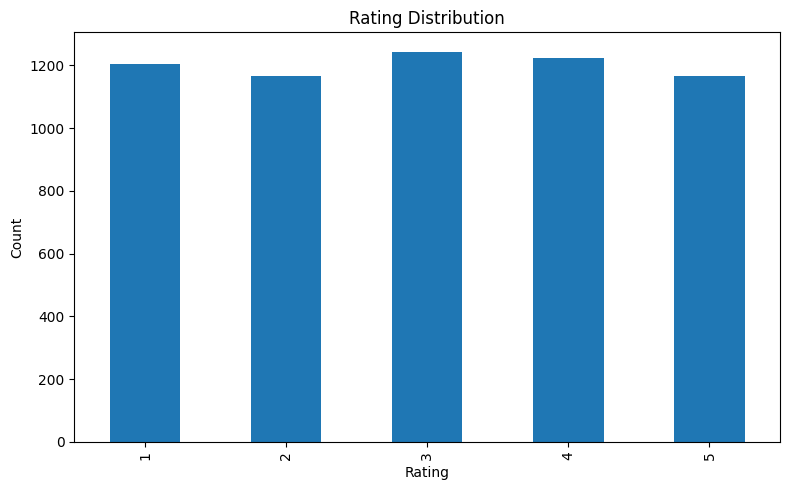

In [ ]:
plt.figure(figsize=(8,5))
df['rating'].value_counts().sort_index().plot(kind='bar')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Histogram

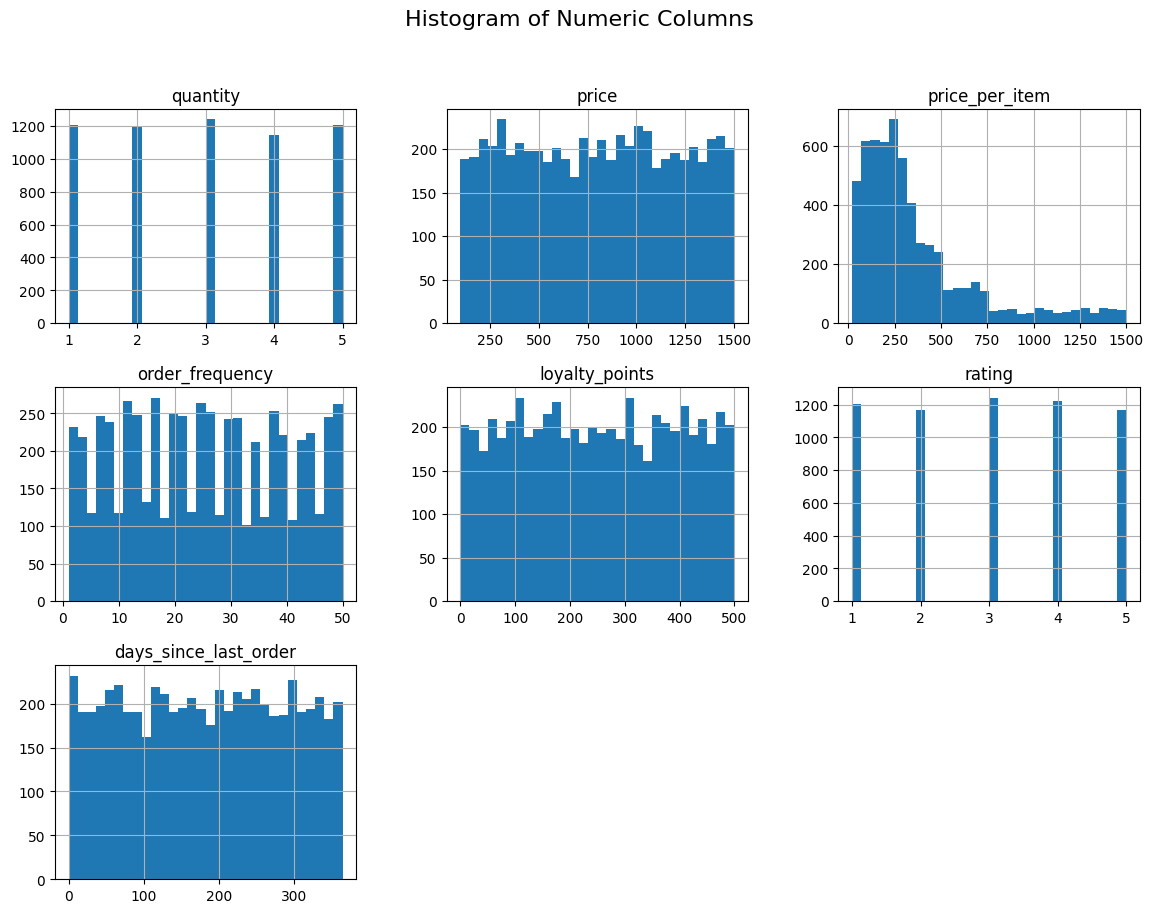

In [ ]:

# กราฟ histogram แสดงการกระจายของตัวเลข
numeric_cols.hist(bins=30, figsize=(14, 10))
plt.suptitle("Histogram of Numeric Columns", fontsize=16)
plt.show()


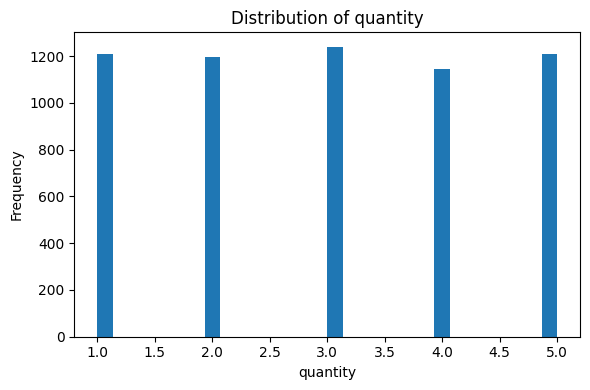

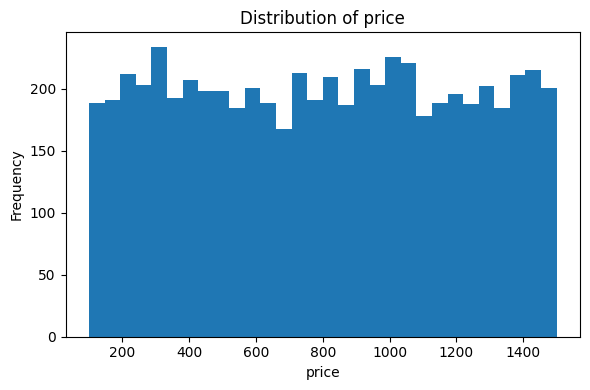

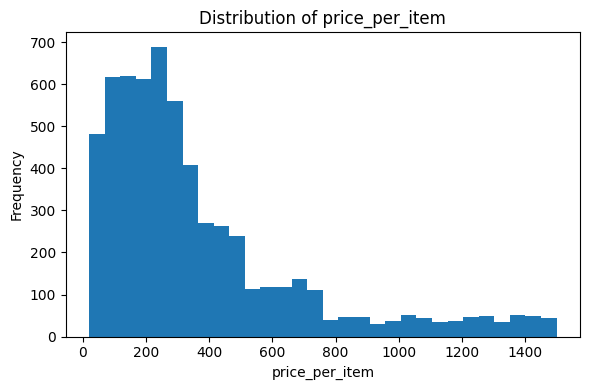

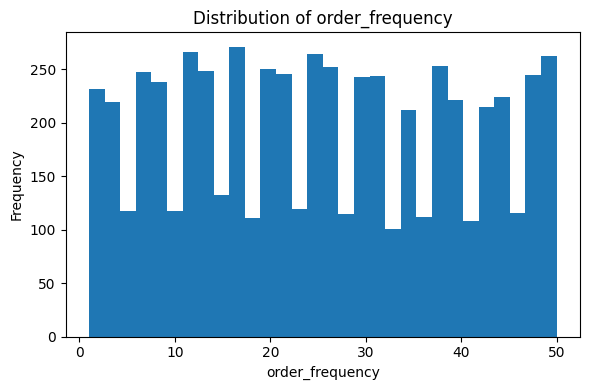

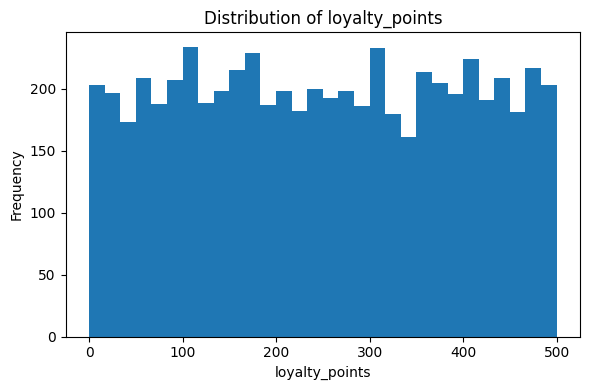

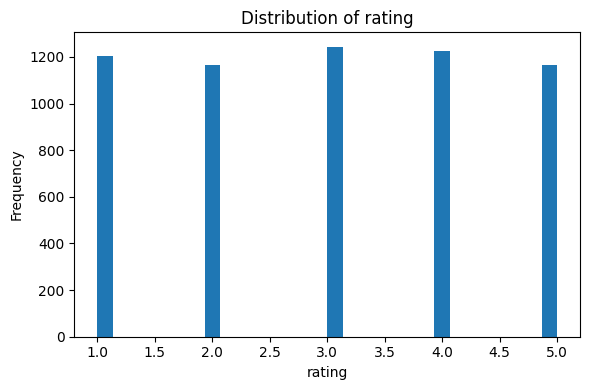

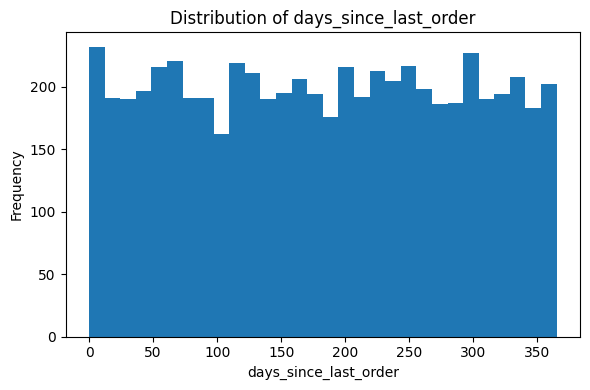

In [ ]:
num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Box plot

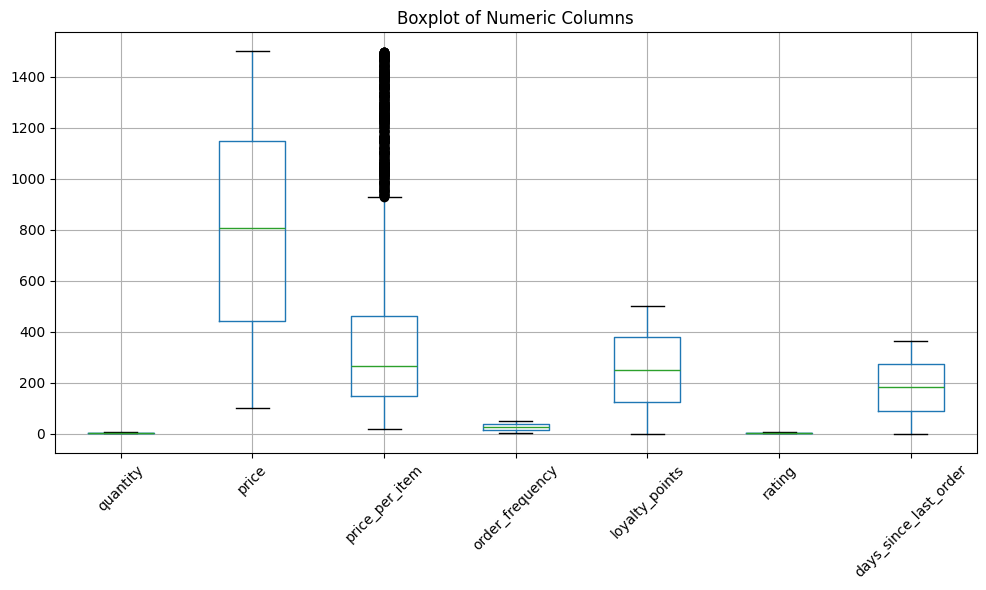

In [ ]:
plt.figure(figsize=(10,6))
numeric_cols.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Columns")
plt.tight_layout()
plt.show()

# Correlation ระหว่างคอลัมน์ Numeric ทั้งหมด + Heatmap

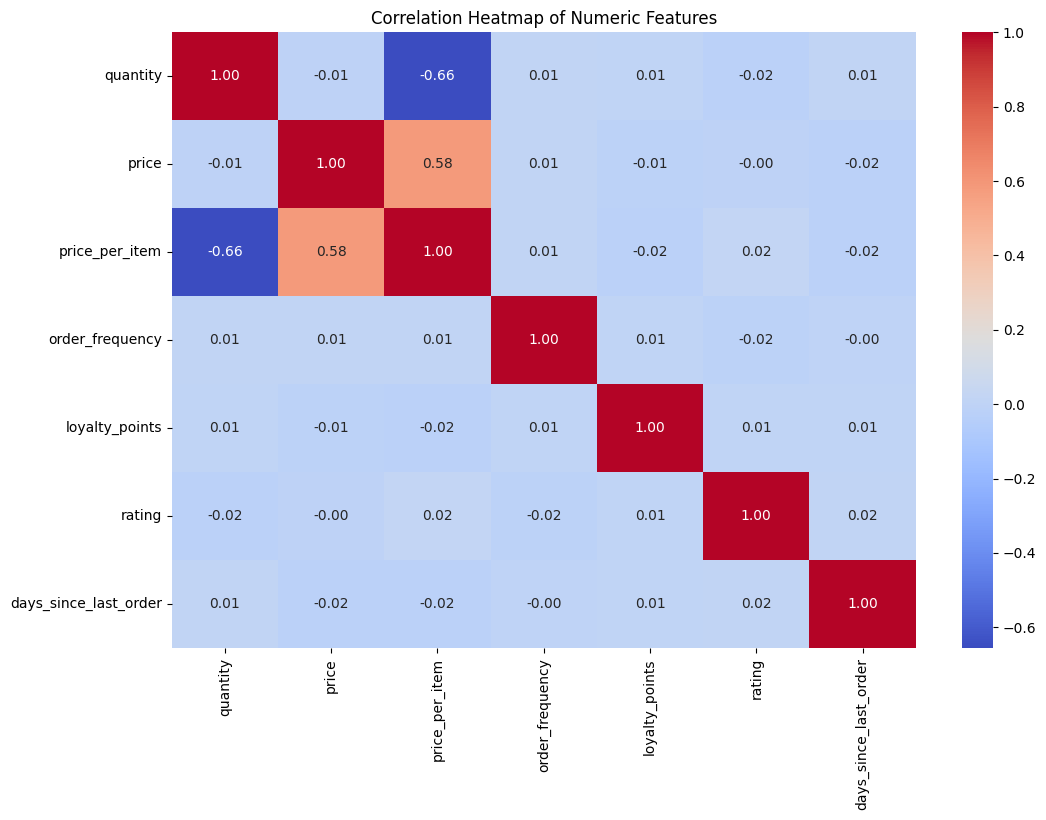

In [ ]:
# correlation matrix
corr = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Insight


📌 Average Price by Churn vs Active:
churned
Active      796.704181
Inactive    805.049356
Name: price, dtype: float64

📌 Order Count by Churn vs Active:
churned
Active      3253
Inactive    2747
Name: order_id, dtype: int64


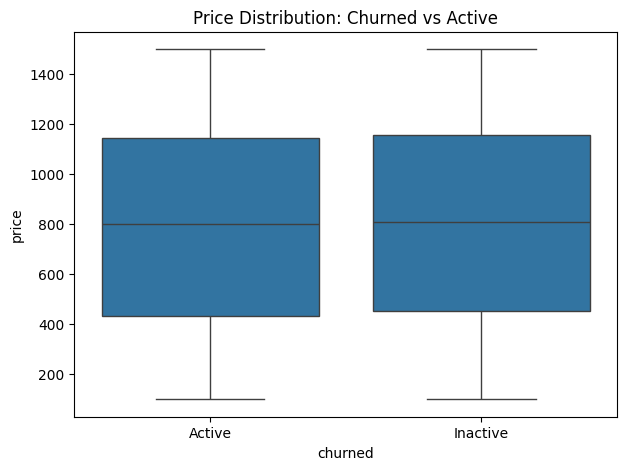

In [ ]:
# แปลง churn เป็นเลข
df['churn_flag'] = df['churned'].map({'Active': 0, 'Inactive': 1})

# Insight 1: ค่าเฉลี่ยยอดใช้จ่ายของสองกลุ่ม
avg_sales = df.groupby('churned')['price'].mean()
print("\n📌 Average Price by Churn vs Active:")
print(avg_sales)

# Insight 2: จำนวนออเดอร์ของแต่ละกลุ่ม
orders = df.groupby('churned')['order_id'].count()
print("\n📌 Order Count by Churn vs Active:")
print(orders)

# Insight 3: กราฟเปรียบเทียบยอดใช้จ่าย
plt.figure(figsize=(7, 5))
sns.boxplot(x='churned', y='price', data=df)
plt.title("Price Distribution: Churned vs Active")
plt.show()

In [ ]:
# =====================================
# 3️⃣ ตรวจสอบคอลัมน์ที่ใช้
# =====================================
print(df[['price', 'churned']].info())
print(df['churned'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    6000 non-null   float64
 1   churned  6000 non-null   object 
dtypes: float64(1), object(1)
memory usage: 93.9+ KB
None
churned
Active      3253
Inactive    2747
Name: count, dtype: int64


In [ ]:
active_sales = df[df['churned'] == 'Active']['price']
inactive_sales = df[df['churned'] == 'Inactive']['price']

print('Active mean price:', active_sales.mean())
print('Inactive mean price:', inactive_sales.mean())



Active mean price: 796.7041807562251
Inactive mean price: 805.0493556607208


In [ ]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(
    active_sales,
    inactive_sales,
    equal_var=False
)

print('T-statistic:', t_stat)
print('P-value:', p_value)


T-statistic: -0.7969206171066529
P-value: 0.4255293665108075


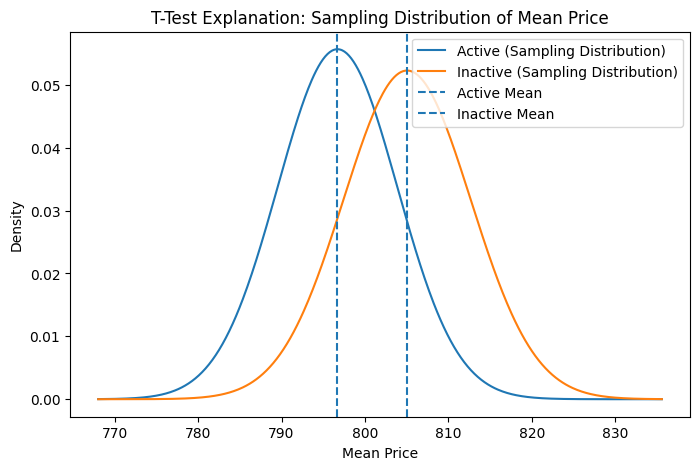

In [ ]:
from scipy.stats import norm

# ค่าเฉลี่ยและส่วนเบี่ยงเบน
mean_active = active_sales.mean()
mean_inactive = inactive_sales.mean()

std_active = active_sales.std()
std_inactive = inactive_sales.std()

n_active = active_sales.shape[0]
n_inactive = inactive_sales.shape[0]

# Standard Error
se_active = std_active / np.sqrt(n_active)
se_inactive = std_inactive / np.sqrt(n_inactive);

# ===============================
# สร้างแกน x สำหรับกราฟ
# ===============================
x_min = min(mean_active - 4*se_active, mean_inactive - 4*se_inactive)
x_max = max(mean_active + 4*se_active, mean_inactive + 4*se_inactive)
x = np.linspace(x_min, x_max, 500)

# ===============================
# Normal Distribution
# ===============================
y_active = norm.pdf(x, mean_active, se_active)
y_inactive = norm.pdf(x, mean_inactive, se_inactive)

# ===============================
# Plot
# ===============================
plt.figure(figsize=(8,5))

plt.plot(x, y_active, label='Active (Sampling Distribution)')
plt.plot(x, y_inactive, label='Inactive (Sampling Distribution)')

# เส้นค่าเฉลี่ย
plt.axvline(mean_active, linestyle='--', label='Active Mean')
plt.axvline(mean_inactive, linestyle='--', label='Inactive Mean')

plt.title('T-Test Explanation: Sampling Distribution of Mean Price')
plt.xlabel('Mean Price')
plt.ylabel('Density')
plt.legend()
plt.show()

# Machine Learning

เพิ่ม feature เพื่อเตรียมเข้าโมเดล


In [ ]:

# Ensure date columns are datetime objects, as they might have been reset if the notebook was restarted without running previous cells.
# Or, if this cell was intended to run after a fresh load without previous feature engineering.
# For now, we'll re-ensure they are datetime objects from the existing df.
df['order_date'] = pd.to_datetime(df['order_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['rating_date'] = pd.to_datetime(df['rating_date'])

# --- Feature Engineering to replace the missing 'FoodPanda_with_new_features.csv' ---

# avg_price_per_unit is equivalent to price_per_item, which already exists
df['avg_price_per_unit'] = df['price_per_item']

# is_repeat_customer: Check if customer has more than one order in the dataset
# This is a simplification; in a real scenario, this would involve looking at all customer orders over time.
repeat_customers = df['customer_id'].value_counts()
df['is_repeat_customer'] = df['customer_id'].map(repeat_customers > 1).astype(int)

# high_loyalty: Define based on loyalty_points (e.g., top 25% of loyalty points)
high_loyalty_threshold = df['loyalty_points'].quantile(0.75)
df['high_loyalty'] = (df['loyalty_points'] >= high_loyalty_threshold).astype(int)

# customer_tenure_days: Days from signup to order date
df['customer_tenure_days'] = (df['order_date'] - df['signup_date']).dt.days

# is_high_value_order: Define based on price (e.g., top 25% of order prices)
high_value_threshold = df['price'].quantile(0.75)
df['is_high_value_order'] = (df['price'] >= high_value_threshold).astype(int)

# days_to_rate: Days from order date to rating date
df['days_to_rate'] = (df['rating_date'] - df['order_date']).dt.days

# is_delivered, is_failed_delivery: Based on delivery_status
df['is_delivered'] = (df['delivery_status'] == 'Delivered').astype(int)
df['is_failed_delivery'] = (df['delivery_status'] == 'Cancelled').astype(int) # Assuming cancelled implies failed

# --- Original feature processing from the cell ---

corr_cols = [
    'price', 'quantity', 'price_per_item',
    'order_frequency', 'loyalty_points', 'days_since_last_order',
    'avg_price_per_unit', 'is_repeat_customer', 'high_loyalty',
    'order_month', 'customer_tenure_days',
    'is_high_value_order', 'days_to_rate',
    'is_delivered', 'is_failed_delivery'
]

# Map 'age' to numerical values for correlation
age_mapping = {'Teenager': 0, 'Adult': 1, 'Senior': 2}
df['age_numeric'] = df['age'].map(age_mapping)
corr_cols.append('age_numeric')

# Create 'churn_flag' from 'churned' column
df['churn_flag'] = df['churned'].map({'Inactive': 1, 'Active': 0})
# Add 'churn_flag' to the list of columns for correlation if it's not already there
if 'churn_flag' not in corr_cols:
    corr_cols.append('churn_flag')

# Ensure 'order_month' is numeric (month number) for correlation
df['order_month'] = df['order_date'].dt.month

# Exclude 'order_dayofweek' as it's a categorical string and not suitable for direct correlation in this context

corr_df = df[corr_cols].corr()

print(corr_df['churn_flag'].sort_values(ascending=False))


churn_flag               1.000000
days_since_last_order    0.132625
order_month              0.015601
price_per_item           0.014169
avg_price_per_unit       0.014169
high_loyalty             0.013445
age_numeric              0.011634
price                    0.010271
is_high_value_order      0.010236
loyalty_points           0.006607
is_failed_delivery       0.004976
customer_tenure_days     0.002280
order_frequency         -0.003843
days_to_rate            -0.004546
is_delivered            -0.013482
quantity                -0.013504
is_repeat_customer            NaN
Name: churn_flag, dtype: float64


# Logistic Regression

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score
)

# ตัวแปรเป้าหมาย
y = df['churn_flag']

# เลือก features
numeric_features = [
    'price', 'quantity', 'order_frequency',
    'loyalty_points', 'days_since_last_order',
    'customer_tenure_days', 'avg_price_per_unit'
]

categorical_features = [
    'payment_method', 'city', 'is_repeat_customer',
    'is_high_value_order', 'high_loyalty'
]

X = df[numeric_features + categorical_features]

# แบ่ง Train / Test (stratify ตาม churn_flag)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ตัวแปลง Column (ใช้ร่วมทุกโมเดล)
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('category', categorical_transformer, categorical_features)
    ]
)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Linear Regression Pipeline
log_reg_clf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        n_jobs=-1
    ))
])

# Train
log_reg_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['price', 'quantity',
                                                   'order_frequency',
                                                   'loyalty_points',
                                                   'days_since_last_order',
                                                   'customer_tenure_days',
                                                   'avg_price_per_unit']),
                                                 ('category',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['payment_method', 'city',
                                                   'is_repeat_customer',
                                                   'is_high_value_order',
                                                   'high_loyalty'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    n_jobs=-1))])

In [ ]:
log_reg_clf.named_steps['model'].coef_

array([[ 0.01942617, -0.07079691, -0.00598514,  0.0172463 ,  0.25794369,
         0.01674662, -0.04212741, -0.0395829 ,  0.06239399, -0.02310425,
        -0.00633718, -0.07530838,  0.09457395,  0.03867418, -0.05189573,
        -0.00029316, -0.03974998,  0.03945682,  0.03073653, -0.0310297 ]])

In [ ]:
# Predict
# ===============================
y_pred_lr = log_reg_clf.predict(X_test)                 # class (0/1)
y_proba_lr = log_reg_clf.predict_proba(X_test)[:, 1]    # probability

In [ ]:
import pandas as pd

new_customer = pd.DataFrame([{
    # numeric
    'price': 450,
    'quantity': 3,
    'order_frequency': 2,
    'loyalty_points': 120,
    'days_since_last_order': 45,
    'customer_tenure_days': 300,
    'avg_price_per_unit': 150,

    # categorical
    'payment_method': 'Credit Card',
    'city': 'Lahore',
    'is_repeat_customer': 1,
    'is_high_value_order': 0,
    'high_loyalty': 1
}])
# ทำนาย class
churn_pred = log_reg_clf.predict(new_customer)

# ทำนาย probability
churn_proba = log_reg_clf.predict_proba(new_customer)[:, 1]

print("Predicted class (0=No churn, 1=Churn):", churn_pred[0])
print("Churn probability:", churn_proba[0])
if churn_pred[0] == 1:
    print(f"ลูกค้าคนนี้มีแนวโน้ม CHURN ({churn_proba[0]*100:.2f}%)")
else:
    print(f"ลูกค้าคนนี้มีแนวโน้ม NOT CHURN ({(1-churn_proba[0])*100:.2f}%)")


Predicted class (0=No churn, 1=Churn): 0
Churn probability: 0.4284120505304409
ลูกค้าคนนี้มีแนวโน้ม NOT CHURN (57.16%)


In [ ]:
# Evaluation
from sklearn.metrics import r2_score, mean_squared_error
# ===============================
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))

print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report")
print(classification_report(y_test, y_pred_lr))

=== Logistic Regression ===
Accuracy: 0.5561111111111111
ROC-AUC: 0.5791433729906096

Confusion Matrix
[[545 431]
 [368 456]]

Classification Report
              precision    recall  f1-score   support

           0       0.60      0.56      0.58       976
           1       0.51      0.55      0.53       824

    accuracy                           0.56      1800
   macro avg       0.56      0.56      0.56      1800
weighted avg       0.56      0.56      0.56      1800




Random Forest Results
Accuracy: 0.5506
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.62      0.60       976
           1       0.51      0.47      0.49       824

    accuracy                           0.55      1800
   macro avg       0.54      0.54      0.54      1800
weighted avg       0.55      0.55      0.55      1800

Confusion Matrix:


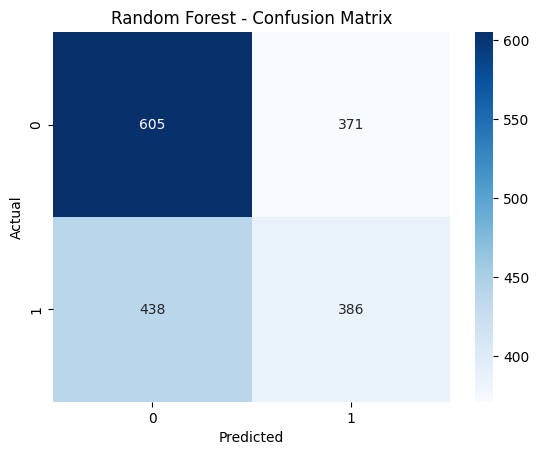

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:05:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Results
Accuracy: 0.5494
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.58      0.58       976
           1       0.51      0.52      0.51       824

    accuracy                           0.55      1800
   macro avg       0.55      0.55      0.55      1800
weighted avg       0.55      0.55      0.55      1800

Confusion Matrix:


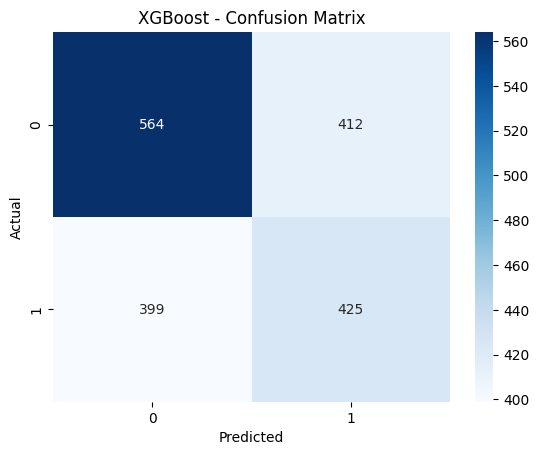

[LightGBM] [Info] Number of positive: 1923, number of negative: 2277
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1344
[LightGBM] [Info] Number of data points in the train set: 4200, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.457857 -> initscore=-0.168972
[LightGBM] [Info] Start training from score -0.168972

LightGBM Results
Accuracy: 0.5517
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.59      0.59       976
           1       0.51      0.51      0.51       824

    accuracy                           0.55      1800
   macro avg       0.55      0.55      0.55      1800
weighted avg       0.55      0.55      0.55      1800

Confusion Matrix:


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


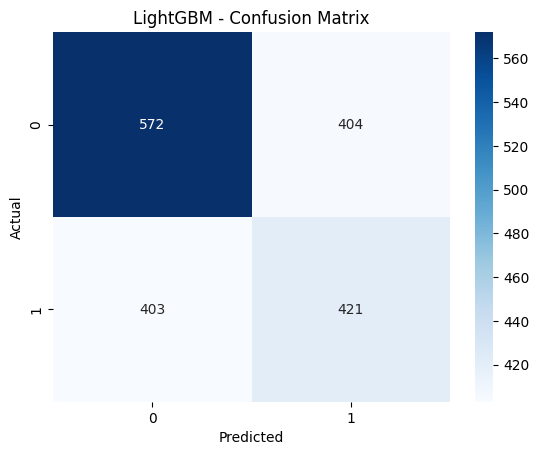

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

models = {
     "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocess), ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name} Results")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Grasient

NameError: name 'df' is not defined